In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rn
from joblib import Parallel, delayed

In [2]:
# Parámetros de estilo de la gráfica
tex_fonts = {
    "text.usetex": True,
    "font.family": "serif",
    "axes.labelsize": 10,
    "font.size": 10,
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9
}

plt.style.use('seaborn-v0_8-white')
plt.rcParams.update(tex_fonts)
plt.rcParams["figure.figsize"] = (5, 2.5)

### Función Montecarlo

In [3]:
def simulacion_monte_carlo(F, N):
    rn.seed(1010)
    # Inicialización del histograma
    bingo = 0
    histograma = np.zeros(len(F))
    # Simulación de lanzamientos            
    for i in range (N):
        r = rn.random()
        for j in np.arange(1, len(F)) :
            if r >= F [j-1] and r < F [j] :
                bingo = j
                break
        histograma[bingo] += 1
    return histograma 

## Función Acumulativa

In [4]:
# Densidad de probabilidad 
def densidad(t, gamma):
    return np.exp(-gamma*t)*gamma

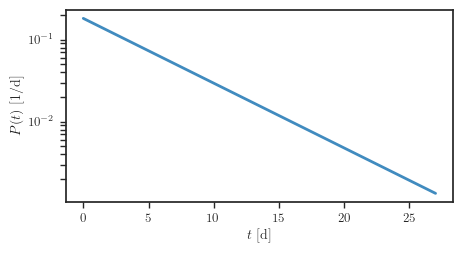

In [5]:
gamma = 0.182
dt = 12/24
t = np.arange(0, 27.4, dt)
plt.semilogy(t, densidad(t, gamma), linewidth = 2, alpha = 0.85)
plt.tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)
plt.xlabel(r'$t \ $[d]')
plt.ylabel(r'$P(t) \ $[1/d]')
plt.show()

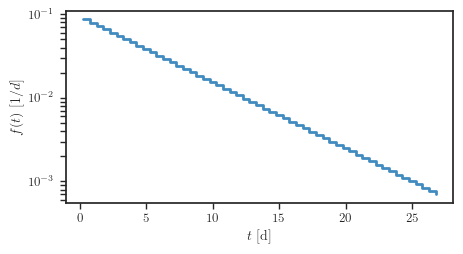

In [6]:
# Frecuencias Discretas
f = (densidad(t[:-1], gamma) - densidad(t[1:], gamma))/(gamma)

plt.semilogy((t[1:]+t[:-1])/2, f, ds='steps-post', linewidth = 2, alpha = 0.85)
plt.tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)
plt.xlabel(r'$t \ $[d]')
plt.ylabel(r'$f(t) \ [1/d]$')
plt.show()

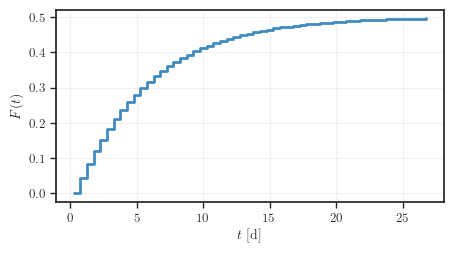

In [7]:
# Frecuencia Acumulativa
F = np.array([np.sum(f[:i])*dt for i in range(len(f))])

plt.plot((t[1:]+t[:-1])/2, F, linewidth = 2, ds='steps-post', alpha = 0.85)
plt.xlabel(r'$t \ $[d]')
plt.ylabel(r'$F(t)$')
plt.tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)
plt.grid(alpha = 0.25)
plt.savefig("g1.png", dpi = 300, bbox_inches ='tight') 
plt.show()

# Montecarlo

In [249]:
histograma = simulacion_monte_carlo(F, 5_000)

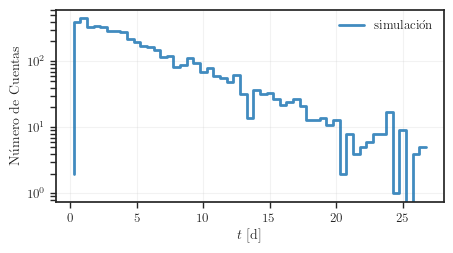

In [262]:
plt.semilogy((t[1:]+t[:-1])/2, histograma, ds = 'steps-pre', linewidth = 2, label = 'simulación', alpha = 0.85)
plt.tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)
plt.xlabel(r'$t \ $[d]')
plt.ylabel(r'Número de Cuentas')
plt.legend()
plt.grid(alpha = 0.25)
plt.savefig("g2.png", dpi = 300, bbox_inches ='tight')
plt.show()

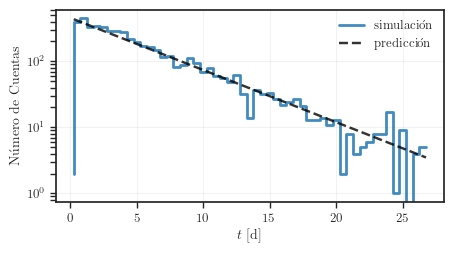

In [263]:
plt.semilogy((t[1:]+t[:-1])/2, histograma, ds = 'steps-pre', linewidth = 2, label = 'simulación', alpha = 0.85)
plt.semilogy((t[1:]+t[:-1])/2, f*5_000, linewidth = 1.75, linestyle = '--', color = 'k', alpha = 0.8, label = 'predicción')
plt.tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)
plt.xlabel(r'$t \ $[d]')
plt.ylabel(r'Número de Cuentas')
plt.legend()
plt.grid(alpha = 0.25)
plt.savefig("g3.png", dpi = 300, bbox_inches ='tight')
plt.show()

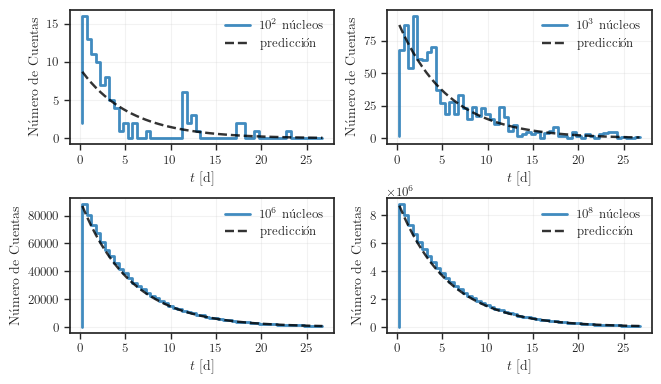

In [90]:
plt.rcParams["figure.figsize"] = (7.5, 4.2)
fig, axs = plt.subplots(2, 2) 
plt.subplots_adjust(wspace = 0.2)
plt.subplots_adjust(hspace = 0.4) 

axs[0,0].semilogy((t[1:]+t[:-1])/2, simulacion_monte_carlo(F, int(1e2)),
    drawstyle = 'steps-pre',
    label = r'$10^2$ núcleos',
    alpha = 0.85, 
    linewidth = 2)
axs[0,0].plot((t[1:]+t[:-1])/2, f*int(1e2), linewidth = 1.75, linestyle = '--', color = 'k', alpha = 0.8, label = 'predicción')
axs[0,0].legend(loc = 1)
axs[0,0].set_xlabel(r'$t$ [d]')
axs[0,0].set_ylabel('Número de Cuentas')
axs[0,0].grid(alpha = 0.25)
axs[0,0].tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)


axs[0,1].semilogy((t[1:]+t[:-1])/2, simulacion_monte_carlo(F, int(1e3)),
    drawstyle = 'steps-pre',
    label = r'$10^3$ núcleos',
    alpha = 0.85, 
    linewidth = 2)
axs[0,1].plot((t[1:]+t[:-1])/2, f*int(1e3), linewidth = 1.75, linestyle = '--', color = 'k', alpha = 0.8, label = 'predicción')
axs[0,1].legend(loc = 1)
axs[0,1].set_xlabel(r'$t$ [d]')
axs[0,1].set_ylabel('Número de Cuentas')
axs[0,1].grid(alpha = 0.25)
axs[0,1].tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)

axs[1,0].semilogy((t[1:]+t[:-1])/2, simulacion_monte_carlo(F, int(1e6)),
    drawstyle = 'steps-pre',
    label = r'$10^6$ núcleos',
    alpha = 0.85, 
    linewidth = 2)
axs[1,0].plot((t[1:]+t[:-1])/2, f*int(1e6), linewidth = 1.75, linestyle = '--', color = 'k', alpha = 0.8, label = 'predicción')
axs[1,0].legend(loc = 1)
axs[1,0].set_xlabel(r'$t$ [d]')
axs[1,0].set_ylabel('Número de Cuentas')
axs[1,0].grid(alpha = 0.25)
axs[1,0].tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)

axs[1,1].plot((t[1:]+t[:-1])/2, simulacion_monte_carlo(F, int(1e8)),
    drawstyle = 'steps-pre',
    label = r'$10^8$ núcleos',
    alpha = 0.85, 
    linewidth = 2)
axs[1,1].semilogy((t[1:]+t[:-1])/2, f*int(1e8), linewidth = 1.75, linestyle = '--', color = 'k', alpha = 0.8, label = 'predicción')
axs[1,1].legend(loc = 1)
axs[1,1].set_xlabel(r'$t$ [d]')
axs[1,1].set_ylabel('Número de Cuentas')
axs[1,1].grid(alpha = 0.25)
axs[1,1].tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)

plt.savefig("g4.png", dpi = 300, bbox_inches ='tight') 
plt.show()

# Binomial

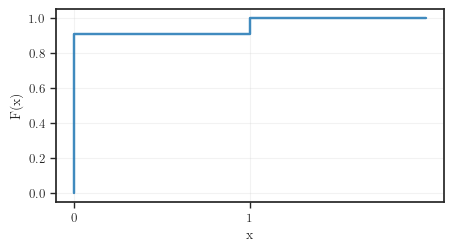

In [128]:
plt.rcParams["figure.figsize"] = (5, 2.5)

plt.plot([0, 0, 1, 2], [0, 0.909, 1, 1], drawstyle = 'steps-post', alpha = 0.85, linewidth = 2)
plt.tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)
plt.ylabel('F(x)')
plt.xlabel('x')
plt.xticks([0, 1], [0 ,1])
plt.grid(alpha = 0.25)
plt.savefig("g5.png", dpi = 300, bbox_inches ='tight') 
plt.show()

In [9]:
def binomial_carlo(N0):

    nucleos = [N0]

    for td in t:
        N = nucleos[-1]
        hist = simulacion_monte_carlo([0, 0.909, 1], int(N))
        nucleos.append(N-hist[2])

    nucleos = np.array(nucleos)

    cuentas = nucleos[:-1]-nucleos[1:]
    return nucleos, cuentas

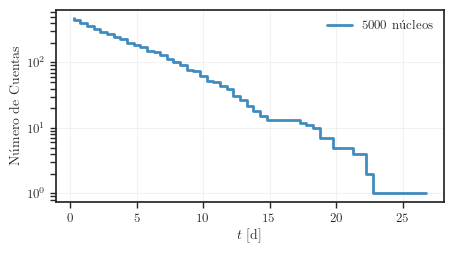

In [12]:
plt.semilogy((t[1:]+t[:-1])/2, binomial_carlo(5_000)[1][:-1], drawstyle = 'steps-pre', label = r'$5000$ núcleos', linewidth = 2, alpha = 0.85)
plt.tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)
plt.xlabel(r'$t \ $[d]')
plt.ylabel(r'Número de Cuentas')
plt.legend()
plt.grid(alpha = 0.25)
plt.savefig("g6.png", dpi = 300, bbox_inches ='tight')
plt.show()

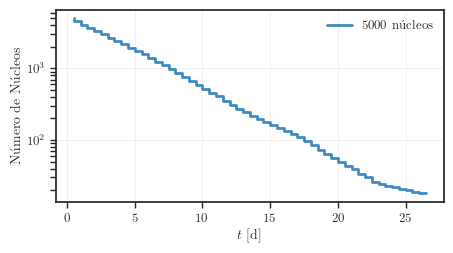

In [14]:
plt.semilogy((t[2:]+t[:-2])/2, binomial_carlo(5_000)[0][:-1][:-2], drawstyle = 'steps-pre', label = r'$5000$ núcleos', linewidth = 2, alpha = 0.85)
plt.tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)
plt.xlabel(r'$t \ $[d]')
plt.ylabel(r'Número de Núcleos')
plt.legend()
plt.grid(alpha = 0.25)
plt.savefig("g7.png", dpi = 300, bbox_inches ='tight')
plt.show()

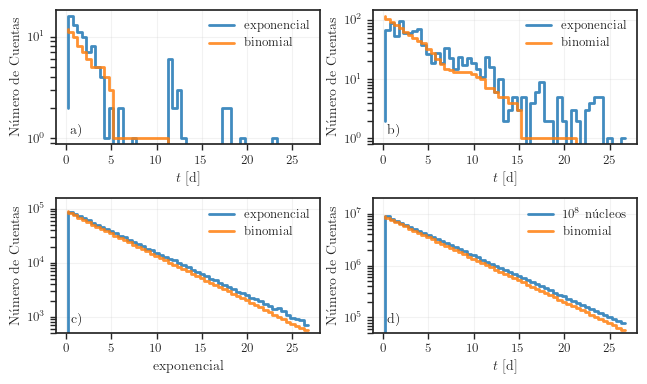

In [38]:
plt.rcParams["figure.figsize"] = (7.5, 4.2)
fig, axs = plt.subplots(2, 2) 
plt.subplots_adjust(wspace = 0.2)
plt.subplots_adjust(hspace = 0.4) 

axs[0,0].semilogy((t[1:]+t[:-1])/2, simulacion_monte_carlo(F, int(1e2)),
    drawstyle = 'steps-pre',
    label = r'exponencial',
    alpha = 0.85, 
    linewidth = 2)
axs[0,0].semilogy((t[1:]+t[:-1])/2, binomial_carlo(1e2)[1][:-1],
    drawstyle = 'steps-pre',
    label = r'binomial',
    alpha = 0.85, 
    linewidth = 2)
axs[0,0].text(
    0.10, 0.15, 'a)', 
    transform = axs[0,0].transAxes,
    fontsize = 10, 
    verticalalignment = 'top', 
    horizontalalignment = 'right'
)
axs[0,0].legend(loc = 1)
axs[0,0].set_xlabel(r'$t$ [d]')
axs[0,0].set_ylabel('Número de Cuentas')
axs[0,0].grid(alpha = 0.25)
axs[0,0].tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)


axs[0,1].semilogy((t[1:]+t[:-1])/2, simulacion_monte_carlo(F, int(1e3)),
    drawstyle = 'steps-pre',
    label = r'exponencial',
    alpha = 0.85, 
    linewidth = 2)
axs[0,1].semilogy((t[1:]+t[:-1])/2, binomial_carlo(1e3)[1][:-1],
    drawstyle = 'steps-pre',
    label = r'binomial',
    alpha = 0.85, 
    linewidth = 2)
axs[0,1].text(
    0.10, 0.15, 'b)', 
    transform = axs[0,1].transAxes,
    fontsize = 10, 
    verticalalignment = 'top', 
    horizontalalignment = 'right'
)
axs[0,1].legend(loc = 1)
axs[0,1].set_xlabel(r'$t$ [d]')
axs[0,1].set_ylabel('Número de Cuentas')
axs[0,1].grid(alpha = 0.25)
axs[0,1].tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)

axs[1,0].semilogy((t[1:]+t[:-1])/2, simulacion_monte_carlo(F, int(1e6)),
    drawstyle = 'steps-pre',
    label = r'exponencial',
    alpha = 0.85, 
    linewidth = 2)
axs[1,0].semilogy((t[1:]+t[:-1])/2, binomial_carlo(1e6)[1][:-1],
    drawstyle = 'steps-pre',
    label = r'binomial',
    alpha = 0.85, 
    linewidth = 2)
axs[1,0].text(
    0.10, 0.15, 'c)', 
    transform = axs[1,0].transAxes,
    fontsize = 10, 
    verticalalignment = 'top', 
    horizontalalignment = 'right'
)
axs[1,0].legend(loc = 1)
axs[1,0].set_ylim(500)
axs[1,0].set_xlabel(r'exponencial')
axs[1,0].set_ylabel('Número de Cuentas')
axs[1,0].grid(alpha = 0.25)
axs[1,0].tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)

axs[1,1].plot((t[1:]+t[:-1])/2, simulacion_monte_carlo(F, int(1e8)),
    drawstyle = 'steps-pre',
    label = r'$10^8$ núcleos',
    alpha = 0.85, 
    linewidth = 2)
axs[1,1].text(
    0.10, 0.15, 'd)', 
    transform = axs[1,1].transAxes,
    fontsize = 10, 
    verticalalignment = 'top', 
    horizontalalignment = 'right'
)
axs[1,1].semilogy((t[1:]+t[:-1])/2, binomial_carlo(1e8)[1][:-1],
    drawstyle = 'steps-pre',
    label = r'binomial',
    alpha = 0.85, 
    linewidth = 2)
axs[1,1].legend(loc = 1)
axs[1,1].set_xlabel(r'$t$ [d]')
axs[1,1].set_ylabel('Número de Cuentas')
axs[1,1].grid(alpha = 0.25)
axs[1,1].set_ylim(50000)
axs[1,1].tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)

plt.savefig("g8.png", dpi = 300, bbox_inches ='tight') 
plt.show()

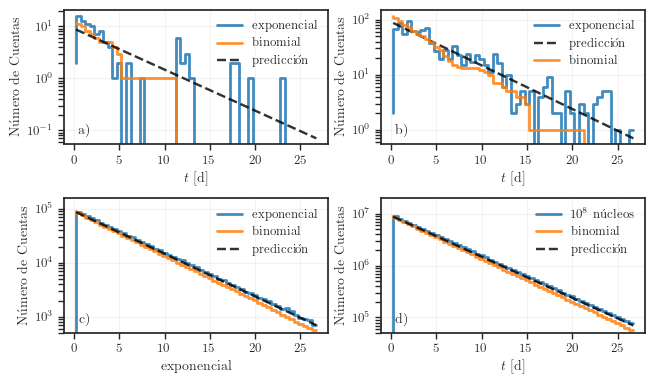

In [39]:
plt.rcParams["figure.figsize"] = (7.5, 4.2)
fig, axs = plt.subplots(2, 2) 
plt.subplots_adjust(wspace = 0.2)
plt.subplots_adjust(hspace = 0.4) 

axs[0,0].semilogy((t[1:]+t[:-1])/2, simulacion_monte_carlo(F, int(1e2)),
    drawstyle = 'steps-pre',
    label = r'exponencial',
    alpha = 0.85, 
    linewidth = 2)
axs[0,0].semilogy((t[1:]+t[:-1])/2, binomial_carlo(1e2)[1][:-1],
    drawstyle = 'steps-pre',
    label = r'binomial',
    alpha = 0.85, 
    linewidth = 2)
axs[0,0].plot((t[1:]+t[:-1])/2, f*int(1e2), linewidth = 1.75, linestyle = '--', color = 'k', alpha = 0.8, label = 'predicción')
axs[0,0].text(
    0.10, 0.15, 'a)', 
    transform = axs[0,0].transAxes,
    fontsize = 10, 
    verticalalignment = 'top', 
    horizontalalignment = 'right'
)
axs[0,0].legend(loc = 1)
axs[0,0].set_xlabel(r'$t$ [d]')
axs[0,0].set_ylabel('Número de Cuentas')
axs[0,0].grid(alpha = 0.25)
axs[0,0].tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)


axs[0,1].semilogy((t[1:]+t[:-1])/2, simulacion_monte_carlo(F, int(1e3)),
    drawstyle = 'steps-pre',
    label = r'exponencial',
    alpha = 0.85, 
    linewidth = 2)
axs[0,1].plot((t[1:]+t[:-1])/2, f*int(1e3), linewidth = 1.75, linestyle = '--', color = 'k', alpha = 0.8, label = 'predicción')
axs[0,1].semilogy((t[1:]+t[:-1])/2, binomial_carlo(1e3)[1][:-1],
    drawstyle = 'steps-pre',
    label = r'binomial',
    alpha = 0.85, 
    linewidth = 2)
axs[0,1].text(
    0.10, 0.15, 'b)', 
    transform = axs[0,1].transAxes,
    fontsize = 10, 
    verticalalignment = 'top', 
    horizontalalignment = 'right'
)
axs[0,1].legend(loc = 1)
axs[0,1].set_xlabel(r'$t$ [d]')
axs[0,1].set_ylabel('Número de Cuentas')
axs[0,1].grid(alpha = 0.25)
axs[0,1].tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)

axs[1,0].semilogy((t[1:]+t[:-1])/2, simulacion_monte_carlo(F, int(1e6)),
    drawstyle = 'steps-pre',
    label = r'exponencial',
    alpha = 0.85, 
    linewidth = 2)
axs[1,0].semilogy((t[1:]+t[:-1])/2, binomial_carlo(1e6)[1][:-1],
    drawstyle = 'steps-pre',
    label = r'binomial',
    alpha = 0.85, 
    linewidth = 2)
axs[1,0].plot((t[1:]+t[:-1])/2, f*int(1e6), linewidth = 1.75, linestyle = '--', color = 'k', alpha = 0.8, label = 'predicción')
axs[1,0].text(
    0.10, 0.15, 'c)', 
    transform = axs[1,0].transAxes,
    fontsize = 10, 
    verticalalignment = 'top', 
    horizontalalignment = 'right'
)
axs[1,0].legend(loc = 1)
axs[1,0].set_ylim(500)
axs[1,0].set_xlabel(r'exponencial')
axs[1,0].set_ylabel('Número de Cuentas')
axs[1,0].grid(alpha = 0.25)
axs[1,0].tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)

axs[1,1].plot((t[1:]+t[:-1])/2, simulacion_monte_carlo(F, int(1e8)),
    drawstyle = 'steps-pre',
    label = r'$10^8$ núcleos',
    alpha = 0.85, 
    linewidth = 2)
axs[1,1].text(
    0.10, 0.15, 'd)', 
    transform = axs[1,1].transAxes,
    fontsize = 10, 
    verticalalignment = 'top', 
    horizontalalignment = 'right'
)
axs[1,1].semilogy((t[1:]+t[:-1])/2, binomial_carlo(1e8)[1][:-1],
    drawstyle = 'steps-pre',
    label = r'binomial',
    alpha = 0.85, 
    linewidth = 2)
axs[1,1].semilogy((t[1:]+t[:-1])/2, f*int(1e8), linewidth = 1.75, linestyle = '--', color = 'k', alpha = 0.8, label = 'predicción')
axs[1,1].legend(loc = 1)
axs[1,1].set_xlabel(r'$t$ [d]')
axs[1,1].set_ylabel('Número de Cuentas')
axs[1,1].grid(alpha = 0.25)
axs[1,1].set_ylim(50000)
axs[1,1].tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)

plt.savefig("g9.png", dpi = 300, bbox_inches ='tight') 
plt.show()